In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px


In [21]:
#See the yahoo finance ticker for your stock symbol
stock_symbol = 'AAPL'

In [22]:
from prophet import Prophet

[*********************100%%**********************]  1 of 1 completed


22:58:46 - cmdstanpy - INFO - Chain [1] start processing
22:58:48 - cmdstanpy - INFO - Chain [1] done processing


            ds      yhat  yhat_lower  yhat_upper
268 2024-03-24  5.167665    5.139963    5.195960
269 2024-03-25  5.165963    5.137127    5.194450
270 2024-03-26  5.163624    5.133588    5.193473
271 2024-03-27  5.161326    5.131280    5.191249
272 2024-03-28  5.161988    5.129893    5.193070


C:\Users\pc\AppData\Local\Temp\ipykernel_15552\141448691.py:27: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


IndexError: list index out of range

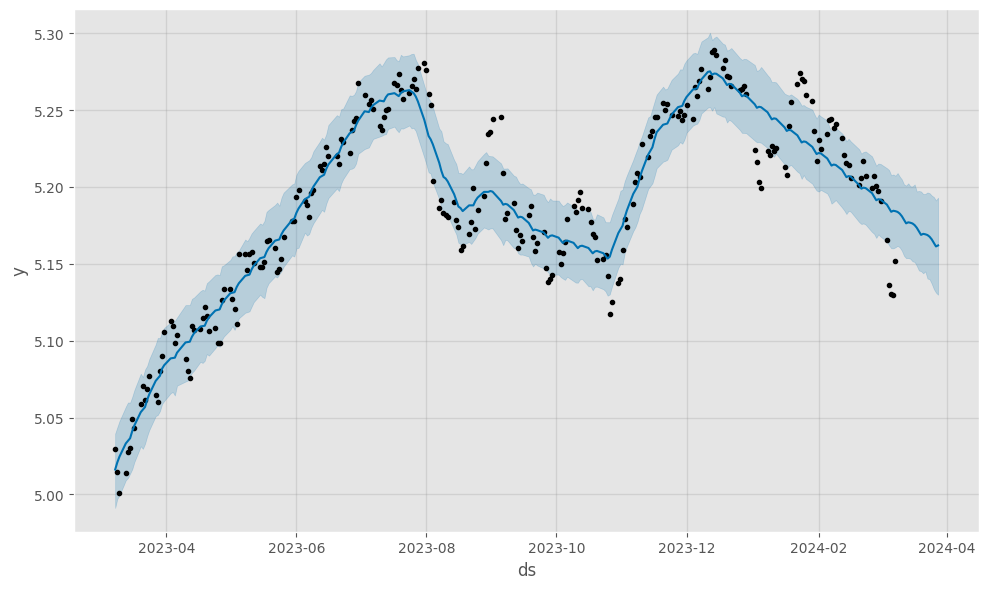

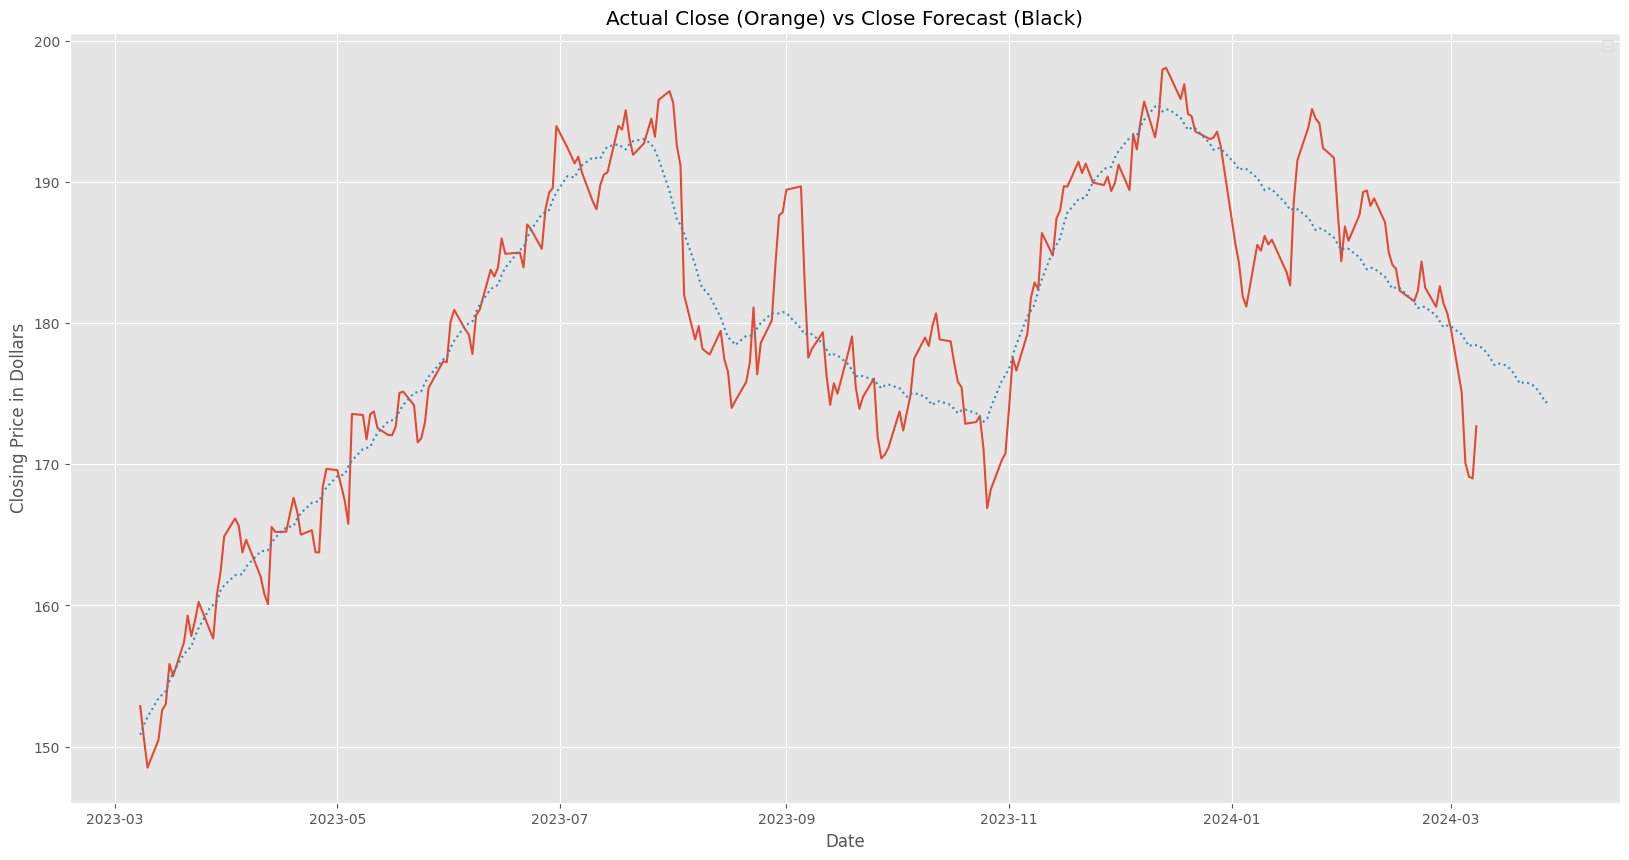

In [121]:
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

def yahoo_stocks(stock_symbol):
    stock_data = yf.download(stock_symbol, period='1y',interval='1d')
    return stock_data

def main():
    stock_symbol=input("Enter the stock symbol: ")
    df_whole = yahoo_stocks(stock_symbol)
    df = df_whole.filter(['Close'])
    
    df['ds'] = df.index
    #log transform the ‘Close’ variable to convert non-stationary data to stationary.
    df['y'] = np.log(df['Close'])
    
    model = Prophet()
    model.fit(df)
    num_days = int(input("Enter no of days to predict stock price for: "))
    
    future = model.make_future_dataframe(periods=num_days)
    forecast = model.predict(future)
    
    print (forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

    forecast_plot = model.plot(forecast)
    forecast_plot.show()

     #make the vizualization a little better to understand
    df.set_index('ds', inplace=True)
    forecast.set_index('ds', inplace=True)
    
    viz_df = df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
    viz_df['yhat_scaled'] = np.exp(viz_df['yhat'])
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
#    ax1.xaxis_date()
    ax1.plot(viz_df.index, viz_df.Close)
    ax1.plot(viz_df.index, viz_df.yhat_scaled, linestyle=':')
    ax1.set_title('Actual Close (Orange) vs Close Forecast (Black)')
    ax1.set_ylabel('Closing Price in Dollars')
    ax1.set_xlabel('Date')
    
    L = ax1.legend() #get the legend
    L.get_texts()[0].set_text('Actual Close') #change the legend text for 1st plot
    L.get_texts()[1].set_text('Forecasted Close') #change the legend text for 2nd plot
    
    plt.savefig('graph/prophet.png', bbox_inches='tight')
    plt.show()
    
    #plot using dataframe's plot function
    viz_df['Actual Close'] = viz_df['Close']
    viz_df['Forecasted Close'] = viz_df['yhat_scaled']
    
    viz_df[['Actual Close', 'Forecasted Close']].plot()

    
if __name__ == "__main__":
    main()


In [13]:
#last 5 years data with interval of 1 day
data = yf.download(tickers="AAPL.NS",period='1y',interval='1d')
data

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AAPL.NS']: Exception('%ticker%: No data found, symbol may be delisted')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [26]:
import pandas as pd
import numpy as np
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly


def yahoo_stocks(stock_symbol):
    stock_data = yf.download(stock_symbol, period='1  Cell In[38], line 49
    model = Prophet()                                                               .
                                                                                     ^
SyntaxError: invalid syntaxy',interval='1d')
    stock_data=stock_data.reset_index()
    return stock_data

def main():
    stock = input("Enter stock name(ex:GOOGL, AAPL): ")
    df_whole = yahoo_stocks(stock)    
    df = df_whole.filter(['Close'])
    df['ds'] = df.index
    df['y'] = np.log(df['Close'])
    model = Prophet()
    model.fit(df)
    num_days = int(input("Enter no of days to predict stock price for: "))
    future = model.make_future_dataframe(periods=num_days)
    forecast = model.predict(future)
    fig1 = model.plot(forecast)
    fig2 = model.plot_components(forecast)
    fig3=plot_plotly(model, forecast)
    fig3.show()
    
if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed


c:\Users\pc\miniconda3\Lib\site-packages\prophet\forecaster.py:287: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



DateParseError: day is out of range for month: 0, at position 0

In [24]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-11,43.872501,44.779999,43.837502,44.724998,43.056713,128044000
2019-03-12,45.000000,45.667500,44.842499,45.227501,43.540466,129870400
2019-03-13,45.562500,45.825001,45.230000,45.427502,43.733002,124130000
2019-03-14,45.974998,46.025002,45.639999,45.932499,44.219154,94318000
2019-03-15,46.212502,46.832500,45.935001,46.529999,44.794376,156171600


In [39]:
import pandas as pd
import plotly.express as px                                                  
import numpy as np
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go




def yahoo_stocks(stock_symbol):
    stock_data = yf.download(stock_symbol, period='5y',interval='1d')
    stock_data=stock_data.reset_index()
    stock_data[['ds','y']] = stock_data[['Date','Adj Close']]                
    return stock_data

def plot_price(df_whole):
    fig = px.line(df_whole, x='Date', y='Close')
    fig.update_xaxes(rangeslider_visible=False)
    fig.show()

def prediction_model(df_whole):
    train_data = df_whole.sample(frac=0.8, random_state=0)
    test_data = df_whole.drop(train_data.index)

    model = Prophet(daily_seasonality=True)
    model.fit(train_data)

    y_actual = test_data['y']
    prediction = model.predict(pd.DataFrame({'ds': test_data['ds']}))
    y_predicted = prediction['yhat'].astype(int)
    mean_absolute_error(y_actual, y_predicted)
    prediction = model.predict(pd.DataFrame({'ds':test_data['ds']}))

    trace_predicted = go.Scatter(x=test_data['ds'], y=y_predicted, mode='lines', name='Predicted', line=dict(color='black'))
    trace_actual = go.Scatter(x=test_data['ds'], y=y_actual, mode='lines', name='Actual', line=dict(color='yellow'))
    layout = go.Layout(
        title="Price Action: Predicted vs Actual",
        xaxis=dict(title="Year"),
        yaxis=dict(title="Price Action"),
        showlegend=True)
    fig = go.Figure(data=[trace_predicted, trace_actual], layout=layout)
    fig.show()

def future_prediction(df_whole):
    model1 = Prophet()                                                               .
    model1.fit(df_whole)                                                           
    future = model1.make_future_dataframe(365)                                       
    forecast = model1.predict(future) 
    model1.plot(forecast)                                                            
    plt.show()     


def main():
    stock = input("Enter stock name(ex:GOOGL, AAPL): ")
    df_whole = yahoo_stocks(stock)
    plot_price(df_whole)   
    prediction_model(df_whole)
    future_prediction(df_whole)
       
if __name__ == "__main__":
    main()


SyntaxError: invalid syntax (3508613622.py, line 49)

In [15]:
type(data)

NameError: name 'data' is not defined

In [56]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-08,42.580002,43.267502,42.375000,43.227501,41.615074,95997600
2019-03-11,43.872501,44.779999,43.837502,44.724998,43.056702,128044000
2019-03-12,45.000000,45.667500,44.842499,45.227501,43.540459,129870400
2019-03-13,45.562500,45.825001,45.230000,45.427502,43.733002,124130000
2019-03-14,45.974998,46.025002,45.639999,45.932499,44.219166,94318000


In [57]:
len(data)

1260

In [58]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81510100
2024-03-05,170.759995,172.039993,169.619995,170.119995,170.119995,95132400
2024-03-06,171.059998,171.240005,168.679993,169.119995,169.119995,68587700
2024-03-07,169.149994,170.729996,168.490005,169.000000,169.000000,71435200
2024-03-08,169.000000,172.479996,168.940002,171.619995,171.619995,30354645


In [59]:
opn = data[['Open']]

In [60]:
px.line(opn, x=opn.index, y='Open', title='Stock Open Price')

In [61]:
ds = opn.values

In [62]:
ds

array([[ 42.58000183],
       [ 43.87250137],
       [ 45.        ],
       ...,
       [171.05999756],
       [169.1499939 ],
       [169.        ]])

In [63]:
# plt.plot(ds)
px.line(ds, title='Stock Open Price')

In [64]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [65]:
len(ds_scaled), len(ds)

(1260, 1260)

In [66]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [67]:
train_size,test_size

(882, 378)

In [68]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [69]:
len(ds_train),len(ds_test)

(882, 378)

In [70]:
print(ds_test)

[[0.72207928]
 [0.72092123]
 [0.72626092]
 [0.75276629]
 [0.75476062]
 [0.72188619]
 [0.72098553]
 [0.69885488]
 [0.68663146]
 [0.71294384]
 [0.73829126]
 [0.70638189]
 [0.69872619]
 [0.68888317]
 [0.7086979 ]
 [0.67588778]
 [0.66598046]
 [0.63497166]
 [0.61522133]
 [0.65909673]
 [0.65292077]
 [0.66411473]
 [0.64307765]
 [0.62943898]
 [0.62609361]
 [0.62114   ]
 [0.59450593]
 [0.65446471]
 [0.63362072]
 [0.66205611]
 [0.63760936]
 [0.64616573]
 [0.64520067]
 [0.67299279]
 [0.69164946]
 [0.69724655]
 [0.67865417]
 [0.67949044]
 [0.7113999 ]
 [0.72375192]
 [0.68431545]
 [0.63998967]
 [0.64018266]
 [0.6081446 ]
 [0.62937468]
 [0.61708696]
 [0.63471437]
 [0.66417913]
 [0.68444414]
 [0.70535253]
 [0.6854735 ]
 [0.66810338]
 [0.70593151]
 [0.69209985]
 [0.67904015]
 [0.68753212]
 [0.68019811]
 [0.6598044 ]
 [0.65433601]
 [0.63574363]
 [0.67955483]
 [0.66507979]
 [0.67672414]
 [0.67222082]
 [0.64082604]
 [0.64191969]
 [0.641791  ]
 [0.64410701]
 [0.68785381]
 [0.66115545]
 [0.63387801]
 [0.60

In [71]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [72]:
def create_ds1(dataset,step):
    Xtest, Ytest = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtest.append(a)
        Ytest.append(dataset[i + step, 0])
    return np.array(Xtest), np.array(Ytest)



In [73]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
# X_test, y_test = create_ds1(ds_test,time_stamp)

In [74]:
X_train.shape,y_train.shape

((781, 100), (781,))

In [75]:
#Taking 100 days price as one record for training
time_stamp = 100
# X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds1(ds_test,time_stamp)


In [76]:
X_test.shape, y_test.shape

((277, 100), (277,))

In [77]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)



In [78]:

# Plotting the MSE errors

window_size = 20
N = ds_train.size
std_avg_predictions = []
mse_errors = []

for pred_idx in range(window_size, N):
    std_avg_predictions.append(np.mean(ds_train[pred_idx - window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1] - ds_train[pred_idx]) ** 2)

mse = np.mean(mse_errors)
# print('MSE error for standard averaging: %.5f' % mse)


In [79]:
all_mid_data = np.concatenate([ds_train,ds_test],axis=0)
print(all_mid_data)

[[0.        ]
 [0.0083151 ]
 [0.0155687 ]
 ...
 [0.82655683]
 [0.81426911]
 [0.81330414]]


In [80]:

# plt.figure(figsize = (18,9))
# plt.plot(range(data.shape[0]),all_mid_data,color='b',label='True')
# plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
# # plt.xticks(range(0,data.shape[0],50),data['Date'].loc[::50],rotation=45)
# plt.title('Prediction vs True Value(Standard Average)')
# plt.xlabel('Date')
# plt.ylabel('Mid Price')
# plt.legend(fontsize=18)
# plt.show()

px.line(all_mid_data, title='Prediction vs True Value(Standard Average)')
px.line(std_avg_predictions)




In [81]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
13/13 [==============================] - 38s 1s/step - loss: 0.0723 - val_loss: 0.0652
Epoch 2/5
13/13 [==============================] - 4s 334ms/step - loss: 0.0121 - val_loss: 0.0018
Epoch 3/5
13/13 [==============================] - 4s 290ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 4/5
13/13 [==============================] - 4s 299ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 5/5
13/13 [==============================] - 4s 290ms/step - loss: 0.0021 - val_loss: 0.0029


In [83]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
# plt.plot(loss)
# px.line(loss, title='Loss')

In [84]:
model.save(f'{stock_symbol}_prediction.keras')

In [85]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 1s 93ms/step


In [86]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

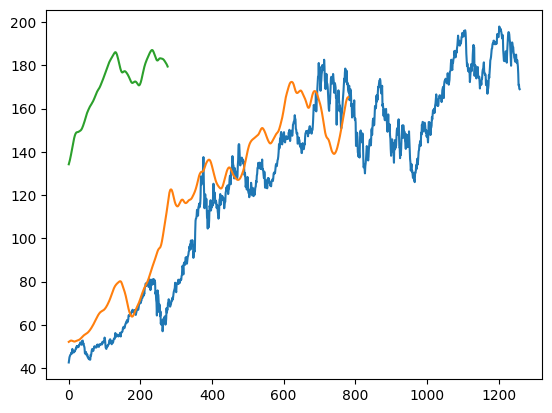

In [87]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [88]:
type(train_predict)

numpy.ndarray

In [89]:
test = np.vstack((train_predict,test_predict))

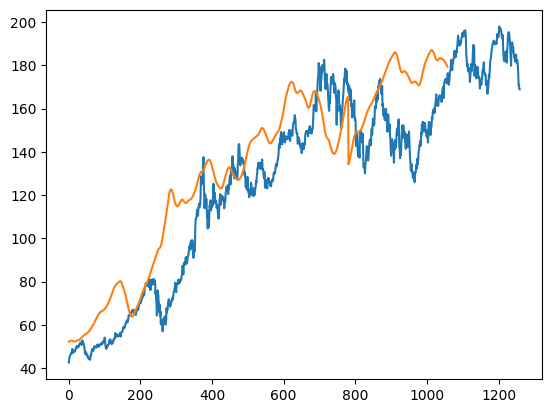

In [90]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [91]:
len(ds_test)

378

In [92]:
#Getting the last 100 days records
fut_inp = ds_test[270:]

In [93]:
fut_inp = fut_inp.reshape(1,-1)

In [94]:
tmp_inp = list(fut_inp)

In [95]:
fut_inp.shape

(1, 108)

In [96]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [97]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=107
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        # fut_inp = fut_inp.reshape((1, n_steps, 1))
        fut_inp = fut_inp[:n_steps].reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.8736589550971985], [0.8696818947792053], [0.8657853007316589], [0.8621233105659485], [0.8587760329246521], [0.8557689189910889], [0.8530902862548828], [0.8507064580917358], [0.848574697971344], [0.846649706363678], [0.8448898196220398], [0.8432583808898926], [0.8417250514030457], [0.8402655124664307], [0.8388616442680359], [0.8374993205070496], [0.836169421672821], [0.8348639607429504], [0.8335790038108826], [0.8323109149932861], [0.8310582637786865], [0.8298195600509644], [0.8285940885543823], [0.8273816108703613], [0.826181948184967], [0.8249951004981995], [0.8238210082054138], [0.8226597309112549], [0.8215107321739197], [0.8203749656677246]]


In [98]:
len(ds_scaled)

1260

In [99]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

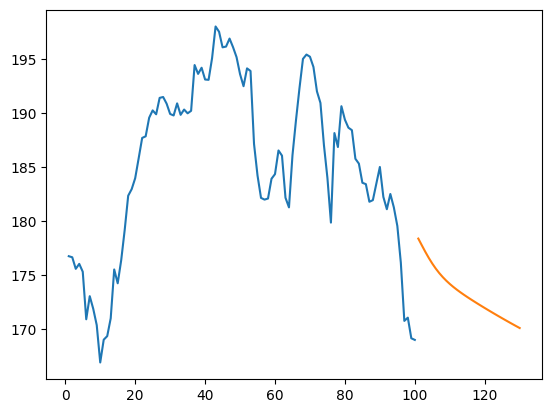

In [101]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[1160:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [102]:
ds_new = ds_scaled.tolist()

In [103]:
len(ds_new)

1260

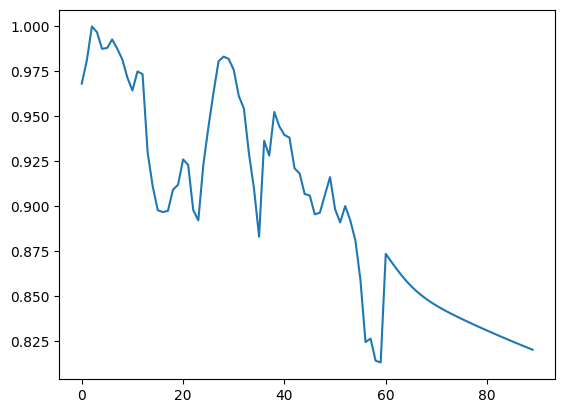

In [104]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [105]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

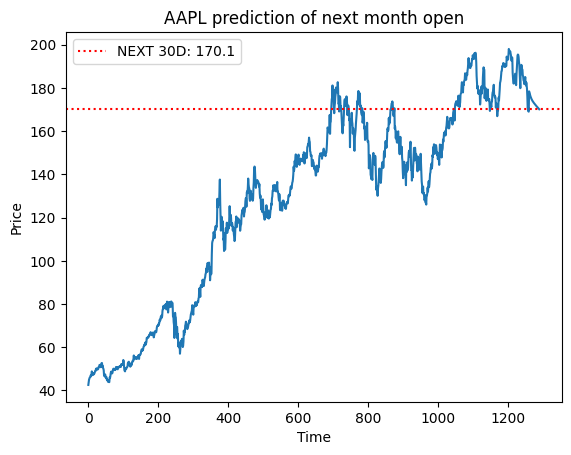

In [106]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()



In [107]:
from keras.models import load_model
def make_predictions(model_path, df):
    model = load_model(model_path)
    predictions = model.predict(df)
    return predictions

In [108]:
def plot_predictions(predictions, df):
    fig = px.line(df, x=df.index, y='Open', title='Stock Open Price')
    fig.add_scatter(x=df.index, y=predictions, mode='lines', name='Predictions')
    return fig 

In [109]:
model_path = f'{stock_symbol}_prediction.keras'
df = X_test
predictions = make_predictions(model_path, df)
fig = plot_predictions(predictions, opn)
fig.show()


9/9 [==============================] - 7s 89ms/step


In [1]:
from sklearn.metrics import mean_absolute_error


In [3]:
import pandas as pd
import plotly.express as px                                                  
import numpy as np
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly
# from scikit-learn import mean_absolute_error
from sklearn.metrics import mean_absolute_error

import plotly.graph_objects as go


# Reliance Industries Limited (RELIANCE.NS)
# Tata Consultancy Services Limited (TCS.NS)
# Infosys Limited (INFY.NS)
# HDFC Bank Limited (HDFCBANK.NS)
# State Bank of India (SBI.NS)
# ICICI Bank Limited (ICICIBANK.NS)
# Hindustan Unilever Limited (HINDUNILVR.NS)
# Axis Bank Limited (AXISBANK.NS)
# Wipro Limited (WIPRO.NS)
# Bharti Airtel Limited (BHARTIARTL.NS)
# Apple Inc. (AAPL)
# Microsoft Corporation (MSFT)
# Amazon.com Inc. (AMZN)
# Alphabet Inc. (GOOGL) - the parent company of Google
# Tesla, Inc. (TSLA)
# Facebook, Inc. (now Meta Platforms, Inc.) (FB)
# JPMorgan Chase & Co. (JPM)
def yahoo_stocks(stock_symbol):
    stock_data = yf.download(stock_symbol, period='5y',interval='1d')
    stock_data=stock_data.reset_index()
    stock_data[['ds','y']] = stock_data[['Date','Adj Close']]                
    return stock_data

def plot_price(df_whole):
    fig = px.line(df_whole, x='Date', y='Close')
    fig.update_xaxes(rangeslider_visible=False)
    fig.show()

def prediction_model(df_whole):
    train_data = df_whole.sample(frac=0.8, random_state=0)
    test_data = df_whole.drop(train_data.index)

    model_1 = Prophet(daily_seasonality=True)
    model_1.fit(train_data)
    
    y_actual = test_data['y']
    prediction = model_1.predict(pd.DataFrame({'ds': test_data['ds']}))
    y_predicted = prediction['yhat'].astype(int)
    mean_absolute_error(y_actual, y_predicted)
    prediction = model_1.predict(pd.DataFrame({'ds':test_data['ds']}))

    trace_predicted = go.Scatter(x=test_data['ds'], y=y_predicted, mode='lines', name='Predicted', line=dict(color='black'))
    trace_actual = go.Scatter(x=test_data['ds'], y=y_actual, mode='lines', name='Actual', line=dict(color='yellow'))
    layout = go.Layout(
        title="Price Action: Predicted vs Actual",
        xaxis=dict(title="Year"),
        yaxis=dict(title="Price Action"),
        showlegend=True)
    fig = go.Figure(data=[trace_predicted, trace_actual], layout=layout)
    fig.show()

def future_prediction(df_whole):
    model_2 = Prophet()                                                     
    model_2.fit(df_whole)                                                           
    future = model_2.make_future_dataframe(365)                                       
    forecast = model_2.predict(future) 
    fig = plot_plotly(model_2, forecast)
    fig.update_xaxes(rangeslider_visible=False)
    fig.show() 
    print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail())

def main():
    stock = input("Enter stock name(ex:GOOGL, AAPL): ")
    df_whole = yahoo_stocks(stock)
    model= Prophet()
    plot_price(df_whole)   
    prediction_model(df_whole)
    future_prediction(df_whole)
       
if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed


11:50:02 - cmdstanpy - INFO - Chain [1] start processing
11:50:02 - cmdstanpy - INFO - Chain [1] done processing


11:50:03 - cmdstanpy - INFO - Chain [1] start processing
11:50:04 - cmdstanpy - INFO - Chain [1] done processing


             ds        yhat  yhat_lower  yhat_upper
1618 2025-04-01  196.273253  162.913205  228.224868
1619 2025-04-02  196.672258  163.479361  228.436652
1620 2025-04-03  197.090438  161.913976  228.572791
1621 2025-04-04  197.346641  164.990035  230.102509
1622 2025-04-05  197.656690  163.084291  230.883724
